<a href="https://colab.research.google.com/github/CornelioEmbedded/Self-Driving-Car/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def draw(x1,x2):
  ln = plt.plot(x1,x2)

def sigmoid(score):
  return 1/(1 + np.exp(-score))

def calculate_error(line_parameters, points, y):
  n = points.shape[0]
  p = sigmoid(points * line_parameters)
  cross_entropy = -(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy

def gradient_descent(line_parameters, points, y, alpha):
  for i in range (2000):
    n = points.shape[0]
    p = sigmoid(points * line_parameters)
    gradient = (points.T * (p - y)) * (alpha/n)
    line_parameters = line_parameters - gradient

    w1 = line_parameters.item(0)
    w2 = line_parameters.item(1)
    b = line_parameters.item(2)

    x1 = np.array([bottom_region[:,0].min(),top_region[:, 0].max()])
    x2 = -b / w2 + x1 * (-w1/w2)
  draw(x1,x2)



In [ ]:
n_pts = 100


np.random.seed(0)
bias = np.ones(n_pts)
random_x1_values = np.random.normal(10, 2, n_pts)
random_x2_values = np.random.normal(10, 2, n_pts)

random_y1_values = np.random.normal(5, 2, n_pts)
random_y2_values = np.random.normal(5, 2, n_pts)


top_region = np.array([random_x1_values, random_x2_values, bias]).T
bottom_region = np.array([random_y1_values, random_y2_values, bias]).T
all_points = np.vstack((top_region, bottom_region))

line_parameters = np.matrix([np.zeros(3)]).T
# x1 = np.array([bottom_region[:,0].min(),top_region[:, 0].max()])
# x2 = -b / w2 + x1 * (-w1/w2)

y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2,1)

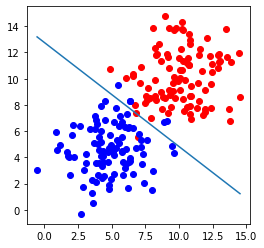

In [ ]:
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:, 0], top_region[:, 1], color = 'r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color = 'b')
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()